Материалы:
* Макрушин С.В. "Лекция 4: Форматы данных"
* https://docs.python.org/3/library/json.html
* https://docs.python.org/3/library/pickle.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html
* Уэс Маккини. Python и анализ данных

---

*Отказ от ответственности: учебные материалы семинара предназначены только(!) для образовательных целей. Мы не призываем никого парсить веб-сайты, особенно те веб-ресурсы, к данным которых нужен особый доступ или сбор данных с которых является противозаконным.*

---

- Application Program Interfaces (APIs)
- Javascript Object Notation (JSON)
- Requests with Python
- Real world use-cases

Существует чрезмерное количество данных в Интернете, к которым можно получить доступ. Знание того, как извлекать и анализировать эти данные, является чрезвычайно полезным навыком.

**Что такое веб-скрейпинг?**

Веб-скрапинг — это процесс сбора или извлечения данных с веб-сайтов.

**API**

Цель веб-скрапинга состоит в том, чтобы получить доступ к данным с веб-сайта или веб-страницы. Иногда веб-сайт может облегчить пользователю прямой доступ к своим данным с помощью API (Application Programming Interface). В основном это означает, что компания создала набор выделенных URL-адресов, которые предоставляют эти данные в чистом виде (то есть без какого-либо форматирования представления). Эти чистые данные часто имеют формат JSON (нотация объектов JavaScript), который мы можем затем проанализировать и извлечь то, что нам нужно, с помощью python.


Но зачем использовать API вместо статического набора данных в формате CSV, который можно загрузить из Интернета?

 API полезны в следующих случаях:

* Данные быстро изменяются . Примером этого являются данные о ценах на акции. На самом деле нет смысла генерировать набор данных и загружать его каждую минуту — это потребует большой пропускной способности и будет довольно медленным.
* Вам нужен небольшой фрагмент гораздо большего набора данных . Комментарии ВК — один из примеров. Что, если вы хотите просто скачать свои комментарии из Вк? Нет особого смысла загружать всю базу данных Вк, а затем фильтровать только свои собственные комментарии.




Когда мы хотим получить данные от API, нам нужно сделать запрос . Запросы используются во всем Интернете.

 В Python наиболее распространенной библиотекой для создания запросов и работы с API является библиотека **requests** . Библиотека  не является частью стандартной библиотеки Python, поэтому вам необходимо установить ее, чтобы начать работу.

Если вы используете pip для управления пакетами Python, вы можете установить запросы с помощью следующей команды:

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

**запрос к  API**

Существует множество различных типов запросов. Наиболее часто используемый запрос GET используется для извлечения данных. Поскольку мы будем работать только с получением данных, наше внимание будет сосредоточено на выполнении запросов GET.

Когда мы делаем запрос, ответ от API приходит с кодом ответа , который сообщает нам, был ли наш запрос успешным. Коды ответов важны, потому что они сразу сообщают нам, если что-то пошло не так.

Чтобы сделать запрос «GET», мы будем использовать **requests.get(**) функцию , которая требует один аргумент — URL-адрес, к которому мы хотим сделать запрос.

# In a Galaxy Far, Far Away….

Отличным API для практики является   неофициальный [API Star Wars](https://swapi.dev/). Этот API представляет собой набор данных из 7 официальных  фильмов. Он включает информацию о каждом фильме, персонажах, а также большую часть планет, космических кораблей и видов, которые можно увидеть в 7 эпизодах. (6 доступных категорий данных — это люди, планеты, фильмы, транспортные средства, космические корабли и т.д.)

**Выполнение вызова API**



In [ ]:
url = "https://swapi.dev/api/"

response = requests.get(url)
print(response.text)

{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}


Функция get()возвращает некоторый объект . Мы можем использовать response.status_code атрибут для получения кода состояния для нашего запроса:

In [ ]:
print(response.status_code)

200


**Коды состояния API**
Коды состояния возвращаются с каждым запросом на веб-сервер. Коды состояния указывают информацию о том, что произошло с запросом. Вот некоторые коды, относящиеся к запросам GET :

* 200: Все прошло нормально, результат возвращен (если есть).
* 301: сервер перенаправляет вас на другую конечную точку. Это может произойти, когда компания меняет доменное имя или имя конечной точки.
* 400: сервер считает, что вы сделали неверный запрос. Это может произойти, если вы не отправляете правильные данные, среди прочего.
* 401: сервер считает, что вы не авторизованы. Для многих API требуются учетные данные для входа, поэтому это происходит, когда вы не отправляете правильные учетные данные для доступа к API.
* 403: Ресурс, к которому вы пытаетесь получить доступ, запрещен: у вас нет прав на его просмотр.
* 404: Ресурс, к которому вы пытались получить доступ, не был найден на сервере.
* 503: сервер не готов обработать запрос.

Вы могли заметить, что все коды состояния, начинающиеся с «4», указывают на какую-то ошибку. Первое число кодов состояния указывает на их категоризацию. Это полезно — вы можете знать, что если ваш код состояния начинается с «2», значит, он прошел успешно, а если он начинается с «4» или «5», значит произошла ошибка. Если вам интересно, вы можете прочитать больше о кодах состояния [здесь](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) .


Как видно из вывода, если мы хотим получить доступ к определенному атрибуту, мы добавляем его к базовому URL-адресу.

Например, чтобы просмотреть атрибут **starships** :

In [ ]:
response = requests.get("https://swapi.dev/api/starships/")
print(response.text)

{"count":36,"next":"https://swapi.dev/api/starships/?page=2","previous":null,"results":[{"name":"CR90 corvette","model":"CR90 corvette","manufacturer":"Corellian Engineering Corporation","cost_in_credits":"3500000","length":"150","max_atmosphering_speed":"950","crew":"30-165","passengers":"600","cargo_capacity":"3000000","consumables":"1 year","hyperdrive_rating":"2.0","MGLT":"60","starship_class":"corvette","pilots":[],"films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/6/"],"created":"2014-12-10T14:20:33.369000Z","edited":"2014-12-20T21:23:49.867000Z","url":"https://swapi.dev/api/starships/2/"},{"name":"Star Destroyer","model":"Imperial I-class Star Destroyer","manufacturer":"Kuat Drive Yards","cost_in_credits":"150000000","length":"1,600","max_atmosphering_speed":"975","crew":"47,060","passengers":"n/a","cargo_capacity":"36000000","consumables":"2 years","hyperdrive_rating":"2.0","MGLT":"60","starship_class":"Star Destroyer","pilot

Мы также можем получить доступ к конкретному кораблю , передав идентификатор в аргументе строки URL, например:

In [ ]:
response = requests.get("https://swapi.dev/api/starships/22")
print(response.text)

{"name":"Imperial shuttle","model":"Lambda-class T-4a shuttle","manufacturer":"Sienar Fleet Systems","cost_in_credits":"240000","length":"20","max_atmosphering_speed":"850","crew":"6","passengers":"20","cargo_capacity":"80000","consumables":"2 months","hyperdrive_rating":"1.0","MGLT":"50","starship_class":"Armed government transport","pilots":["https://swapi.dev/api/people/1/","https://swapi.dev/api/people/13/","https://swapi.dev/api/people/14/"],"films":["https://swapi.dev/api/films/2/","https://swapi.dev/api/films/3/"],"created":"2014-12-15T13:04:47.235000Z","edited":"2014-12-20T21:23:49.900000Z","url":"https://swapi.dev/api/starships/22/"}


In [ ]:
response = requests.get("https://swapi.dev/api/people/")
print(response.text)

{"count":82,"next":"https://swapi.dev/api/people/?page=2","previous":null,"results":[{"name":"Luke Skywalker","height":"172","mass":"77","hair_color":"blond","skin_color":"fair","eye_color":"blue","birth_year":"19BBY","gender":"male","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/6/"],"species":[],"vehicles":["https://swapi.dev/api/vehicles/14/","https://swapi.dev/api/vehicles/30/"],"starships":["https://swapi.dev/api/starships/12/","https://swapi.dev/api/starships/22/"],"created":"2014-12-09T13:50:51.644000Z","edited":"2014-12-20T21:17:56.891000Z","url":"https://swapi.dev/api/people/1/"},{"name":"C-3PO","height":"167","mass":"75","hair_color":"n/a","skin_color":"gold","eye_color":"yellow","birth_year":"112BBY","gender":"n/a","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","http

Выше мы получили код «200», который говорит нам, что наш запрос был успешным. В документации сказано, что ответ API, который мы получим, имеет формат JSON.Воспользуемся методом response.json(), чтобы увидеть данные, которые мы получили от API:

In [ ]:
response = requests.get("https://swapi.dev/api/people/")
print(response.json())

{'count': 82, 'next': 'https://swapi.dev/api/people/?page=2', 'previous': None, 'results': [{'name': 'Luke Skywalker', 'height': '172', 'mass': '77', 'hair_color': 'blond', 'skin_color': 'fair', 'eye_color': 'blue', 'birth_year': '19BBY', 'gender': 'male', 'homeworld': 'https://swapi.dev/api/planets/1/', 'films': ['https://swapi.dev/api/films/1/', 'https://swapi.dev/api/films/2/', 'https://swapi.dev/api/films/3/', 'https://swapi.dev/api/films/6/'], 'species': [], 'vehicles': ['https://swapi.dev/api/vehicles/14/', 'https://swapi.dev/api/vehicles/30/'], 'starships': ['https://swapi.dev/api/starships/12/', 'https://swapi.dev/api/starships/22/'], 'created': '2014-12-09T13:50:51.644000Z', 'edited': '2014-12-20T21:17:56.891000Z', 'url': 'https://swapi.dev/api/people/1/'}, {'name': 'C-3PO', 'height': '167', 'mass': '75', 'hair_color': 'n/a', 'skin_color': 'gold', 'eye_color': 'yellow', 'birth_year': '112BBY', 'gender': 'n/a', 'homeworld': 'https://swapi.dev/api/planets/1/', 'films': ['https:/

In [ ]:
from  pprint import pprint

In [ ]:
pprint(response.json())

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'birth_year': '19BBY',
              'created': '2014-12-09T13:50:51.644000Z',
              'edited': '2014-12-20T21:17:56.891000Z',
              'eye_color': 'blue',
              'films': ['https://swapi.dev/api/films/1/',
                        'https://swapi.dev/api/films/2/',
                        'https://swapi.dev/api/films/3/',
                        'https://swapi.dev/api/films/6/'],
              'gender': 'male',
              'hair_color': 'blond',
              'height': '172',
              'homeworld': 'https://swapi.dev/api/planets/1/',
              'mass': '77',
              'name': 'Luke Skywalker',
              'skin_color': 'fair',
              'species': [],
              'starships': ['https://swapi.dev/api/starships/12/',
                            'https://swapi.dev/api/starships/22/'],
              'url': 'https://swapi.dev/api/people/1/',
              '

---

**Работа с данными JSON в Python**

JSON (нотация объектов JavaScript) — это язык API. JSON — это способ кодирования структур данных, обеспечивающий их легкое чтение компьютерами. JSON — это основной формат, в котором данные передаются в API и обратно, и большинство серверов API отправляют свои ответы в формате JSON.

Вы могли заметить, что вывод JSON, который мы получили от API, выглядел так, как будто он содержит словари Python, списки, строки и целые числа. Вы можете думать о JSON как о комбинации этих объектов, представленных в виде строк.

In [ ]:
# save to json file

import json

response = requests.get(f"https://swapi.dev/api/starships")
data = response.json()
filtered_data = data["results"]

file = 'star_wars_api_data.json'
with open(file, 'w') as f:
    json.dump(filtered_data, f)

---

# Тех задание - Получение датасета Star Wars




* 1: выгрузить  **все** данные из SWAPI и  получить несколько табличек для каждого отдельного вида данных: люди,корабли и тд
* 2 : сформировать плоскую табличку из всех полученныз данных
* 3: добавить описания персонажей из https://en.wikipedia.org/wiki/List_of_Star_Wars_characters
* 3.1 добавить описание к остальным сущностям из других статей википедии

* 4: к каждой сущности (персонаж,корабль) добавить локальный путь до  фото (которое сохранено локально)

  а) к каждой сущности нужно фото выгрузить
  
  б) к каждой сущности в табличке - проставить локальный путь.
* 5: Разбить каждую задачу на технические подзадачи.


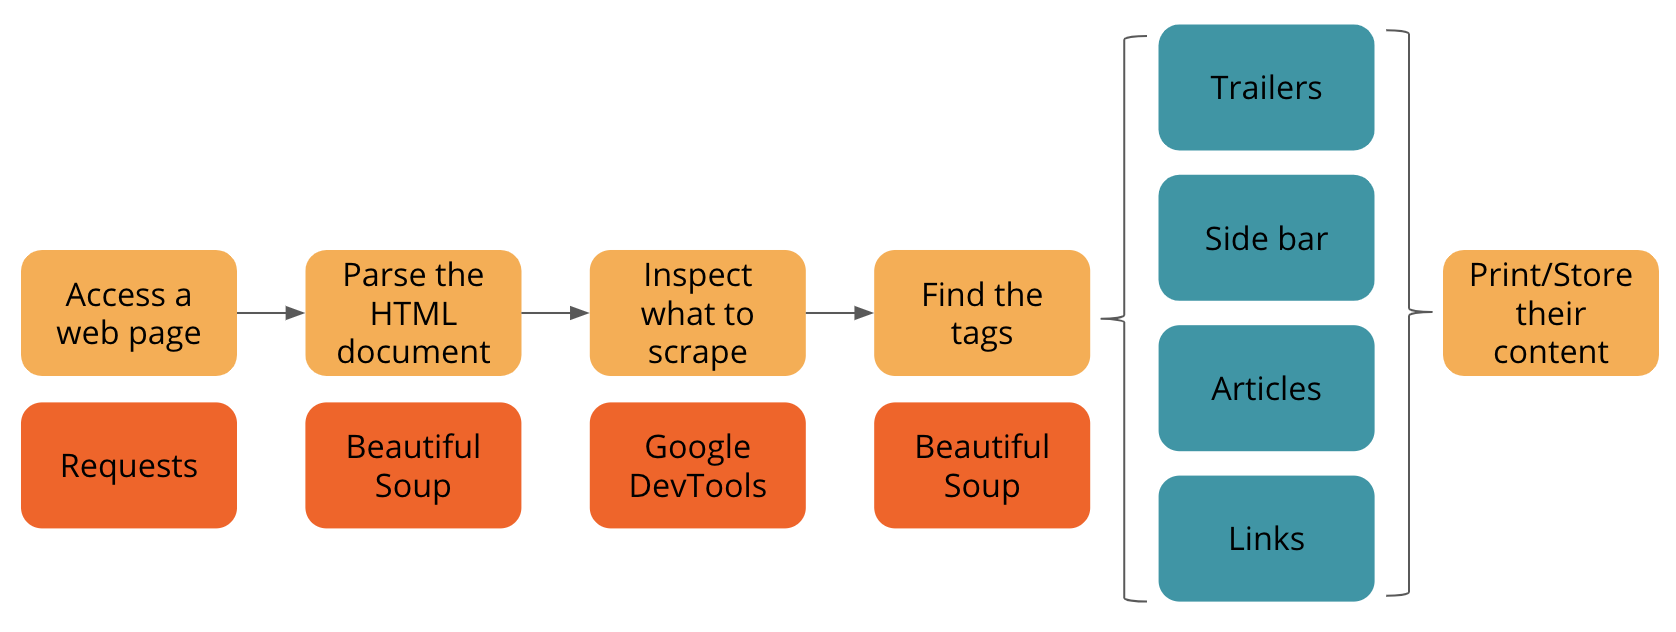

get_star_wars_data('звездолеты') ->

* https://swapi.dev/api/starships/?page=1
* https://swapi.dev/api/starships/?page=2
* https://swapi.dev/api/starships/?page=3


* обработка KeyError - как?
* определить какие поля нужны - и сформировать списки

In [ ]:
!pip install bing_image_downloader
!pip install beautifulsoup4
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1f9d30a480c95b46d87405ea336a3ea00d403d5bc2563709f2e0c57b36076244
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import pandas as pd
from IPython.display import display

In [ ]:
# def get_star_wars_data(attribute :str) -> pd.DataFrame:
#   pass

#   raise NotImplementedError
def get_star_wars_data(attribute) -> pd.DataFrame:
  response = requests.get(f"https://swapi.dev/api/{attribute}")
  data = response.json()
  dataF=pd.DataFrame(data['results'])
  while data['next']!=None:
    response = requests.get(data['next'])
    data = response.json()
    dataF2=pd.DataFrame(data['results'])
    dataF=dataF.append(dataF2,ignore_index=True)
  return(dataF)

In [ ]:
# def parse_attr():
#   raise NotImplementedError
%%time
for i,j in (zip(["people","planets","films","species","vehicles","starships"],
                ['peopledf','planetsdf','filmsdf','speciesdf','vehiclesdf','starshipsdf'])):
  globals()[j]=(get_star_wars_data(i))

CPU times: user 601 ms, sys: 46.7 ms, total: 647 ms
Wall time: 33.4 s


In [ ]:
# response = requests.get("https://swapi.dev/api/people/")
# print(response.json())
(planetsdf)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000,"[https://swapi.dev/api/people/34/, https://swa...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"[https://swapi.dev/api/people/22/, https://swa...",[https://swapi.dev/api/films/5/],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


In [ ]:
# data = response.json()

In [ ]:
# for i in data:
#   print(i)

In [ ]:
# data["count"]

In [ ]:
# data["results"]

---

# Парсим табличку **List of Star Wars characters** с википедии

## HTML page structure
Язык гипертекстовой разметки (HTML) — это стандартный язык разметки для документов, предназначенных для отображения в веб-браузере. HTML описывает структуру веб-страницы и может использоваться с каскадными таблицами стилей (CSS) и языком сценариев, таким как JavaScript, для создания интерактивных веб-сайтов. HTML состоит из ряда элементов, которые «сообщают» браузеру, как отображать содержимое. элементы представлены тегами.

Некоторые тэги:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

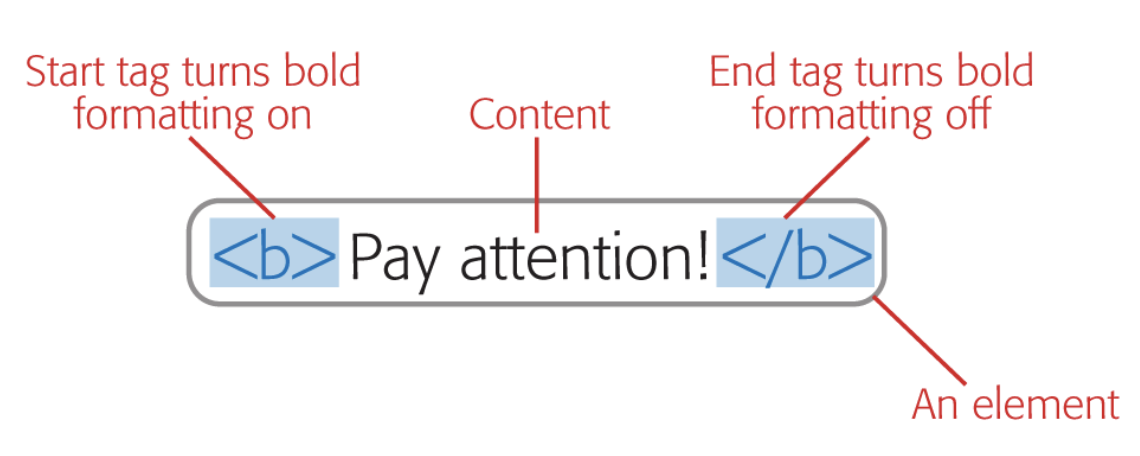

HTML имеет древовидную 🌳 🌲 структуру благодаря **Document Object Model (DOM)**, кроссплатформенному и независимому от языка интерфейсу. Вот как выглядит очень простое HTML-дерево.

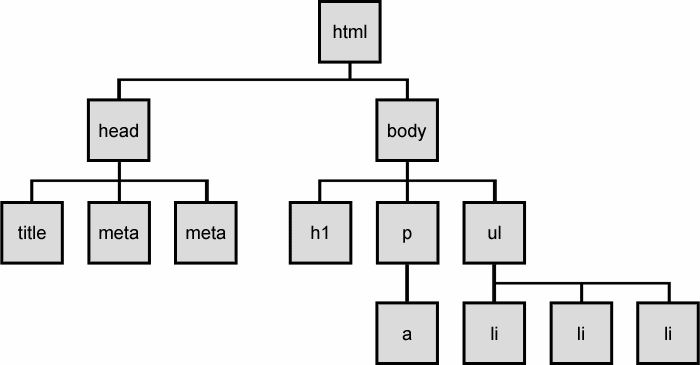

## Простая html-ка

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

## Инструменты разработчика Chrome

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) – это набор инструментов веб-разработчика, встроенных непосредственно в браузер Google Chrome. DevTools может помочь вам просматривать и редактировать веб-страницы. Мы будем использовать Chrome DevTools, чтобы проверить HTML-страницу и найти, какие элементы соответствуют данным, которые мы хотим извлечь.

Общая цель, которую мы преследуем как исследователи при извлечении данных из Интернета, заключается в преобразовании данных из одного структурированного формата (древовидные структуры HTML) в другой структурированный формат (возможно, в табличную структуру со строками и столбцами). Это может включать простое чтение таблиц с веб-страницы вплоть до преобразования элементов HTML с нерегулярной структурой в табличный формат.

https://zetcode.com/python/beautifulsoup/

In [ ]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

import re

In [ ]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_Star_Wars_characters"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [ ]:

soup = BeautifulSoup(response.text,'html.parser')
# #remove references Brackets
# removeBrackets = re.sub(r'\[.*\]', '',html)
# #remove Trailing 0's in numbers
# removeTrails = removeBrackets.replace('0,000,001','')

In [ ]:
a = soup.find('table', {'class': 'wikitable'})

In [ ]:
a

<table class="wikitable sortable">
<tbody><tr>
<th width="10%">Name
</th>
<th width="25%">Portrayal
</th>
<th width="65%">Description
</th></tr>
<tr>
<th colspan="7" style="background-color:#ccccff;">Skywalker family
</th></tr>
<tr>
<td><style data-mw-deduplicate="TemplateStyles:r1023754711">.mw-parser-output .vanchor>:target~.vanchor-text{background-color:#b1d2ff}</style><span class="vanchor"><span id="Shmi_Skywalker"></span><span class="vanchor-text">Shmi Skywalker</span></span>
</td>
<td><a href="/wiki/Pernilla_August" title="Pernilla August">Pernilla August</a> (<i>Episodes I-II</i>)
<p>Voice: Pernilla August (<i>The Clone Wars</i>)
</p>
</td>
<td>Anakin Skywalker's mother, and Luke and Leia's paternal grandmother. <a href="/wiki/Qui-Gon_Jinn" title="Qui-Gon Jinn">Qui-Gon Jinn</a> attempts to bargain for her freedom from slavery but fails. Shmi encourages Anakin to leave Tatooine with Qui-Gon to seek his destiny, but Anakin finds it hard to leave without her. A widowed moisture far

In [ ]:
tables = [ ]
for table in soup.findAll('table', {'class': "wikitable"}):
  tables.append(table)

In [ ]:
len(tables)

137

In [ ]:
len(tables)

137

In [ ]:
pd.read_html(str(tables[0]))[0][['Name','Portrayal','Description']]

,Name,Portrayal,Description
,Skywalker family,Skywalker family,Skywalker family
0,.mw-parser-output .vanchor>:target~.vanchor-te...,Pernilla August (Episodes I-II) Voice: Pernill...,"Anakin Skywalker's mother, and Luke and Leia's..."
1,Anakin SkywalkerDarth Vader,"Anakin:Jake Lloyd (Episode I),[8] Hayden Chris...","Jedi Knight and Dark Lord of the Sith, whose r..."
2,Luke Skywalker,"Mark Hamill (Episodes IV–IX, The Mandalorian, ...",Former moisture farmer and Jedi Knight whose c...
3,Leia Organa,"Carrie Fisher (Episodes IV–IX), Aidan Barton (...","Princess of Alderaan, and leader of the Rebel ..."
4,Han Solo,"Harrison Ford (Episodes IV–VII, IX), Alden Ehr...",Smuggler and captain of the Millennium Falcon ...
5,Ben SoloKylo Ren,Adam Driver (Episodes VII–IX) Voice: Matthew W...,"The son of Han Solo and Leia Organa, the nephe..."


In [ ]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

NameError: ignored

# Грузим фотки из инета

In [ ]:
from bing_image_downloader import downloader

key = "star wars"
query = "Beru Whitesun lars" + key
downloader.download(query, limit=4, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/dataset/Beru Whitesun larsstar wars


[!!]Indexing page: 1

[%] Indexed 4 Images on Page 1.


[%] Downloading Image #1 from http://img1.wikia.nocookie.net/__cb20070625220148/starwars/images/8/84/BeruWhitesunLars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://vignette.wikia.nocookie.net/starwars/images/7/76/Beru_headshot2.jpg/revision/latest?cb=20111029215429
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/04/7d/9d/047d9d78ba0c939b9993db7686add200--the-two-the-ojays.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ebayimg.com/images/g/YkQAAOSw5XVf8pja/s-l300.jpg
[%] File Downloaded !



[%] Done. Downloaded 4 images.


# Достаем данные из википедии

In [ ]:
import wikipedia

query = "Beru Whitesun lars"
wikipedia.search(query)

In [ ]:
wikipedia.summary("List of Star Wars characters", sentences=3)

Домашнее задание:

1) Взять любой API и описать  методы работы с ним - > сделать ноутбук

2) если требуется авторизация - описать методы авторизации
